In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [5]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [6]:
# To Remove duplicates from the index column
df = df[~df.index.duplicated(keep='first')]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 20.9+ KB


In [9]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [10]:
df.isnull().any()

States                                 False
Date                                   False
Frequency                              False
Estimated Unemployment Rate            False
Estimated Employed                     False
Estimated Labour Participation Rate    False
Region                                 False
longitude                              False
latitude                               False
year                                   False
month                                  False
day                                    False
dtype: bool

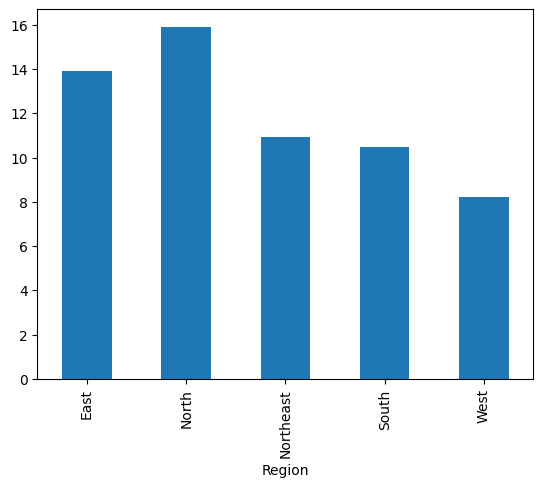

In [11]:
# Calculate the average unemployment rate for each region and plot a bar chart
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate'].mean()
region_unemployment.plot(kind='bar')
plt.show()

In [12]:
#Top 5 state
df['States'].value_counts().head(5)

Andhra Pradesh    10
Assam             10
Uttarakhand       10
Uttar Pradesh     10
Tripura           10
Name: States, dtype: int64

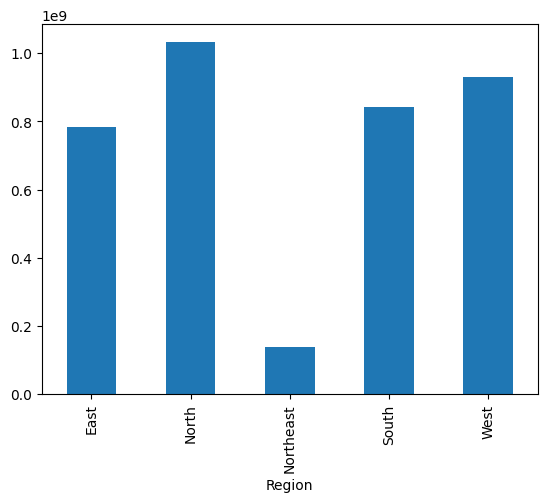

In [14]:
# Calculate the total number of employed people for each region and plot a bar chart
region_employed = df.groupby('Region')['Estimated Employed'].sum()
region_employed.plot(kind='bar')
plt.show()

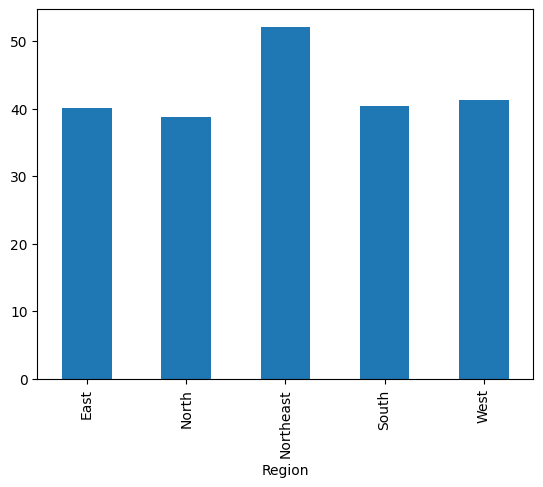

In [15]:
# Calculate the average labour participation rate for each region and plot a bar chart
region_participation = df.groupby('Region')['Estimated Labour Participation Rate'].mean()
region_participation.plot(kind='bar')
plt.show()

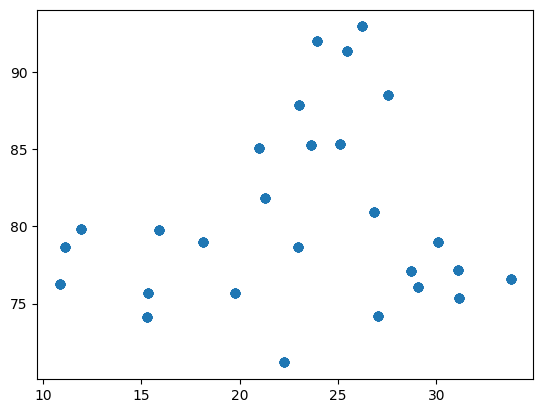

In [16]:
# Plot a scatter plot of the longitude and latitude values
plt.scatter(df['longitude'], df['latitude'])
plt.show()

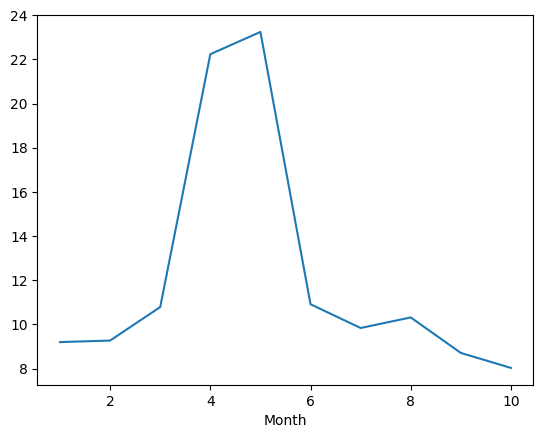

In [17]:
# Calculate the average unemployment rate for each month and plot a line chart
df['Month'] = df['Date'].dt.month
month_unemployment = df.groupby('Month')['Estimated Unemployment Rate'].mean()
month_unemployment.plot(kind='line')
plt.show()

In [18]:
# Calculate the correlation between unemployment rate and labour participation rate
corr = df['Estimated Unemployment Rate'].corr(df['Estimated Labour Participation Rate'])
print(f"Correlation: {corr}")

Correlation: -0.07353988391539262


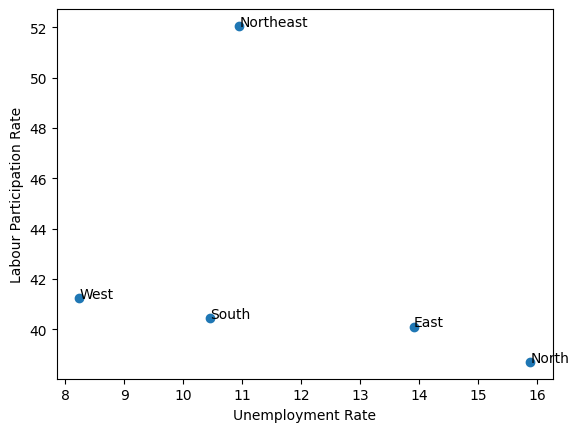

In [19]:
# Calculate the average unemployment rate and participation rate for each region and plot a scatter plot
region_unemployment_participation = df.groupby('Region')[['Estimated Unemployment Rate', 'Estimated Labour Participation Rate']].mean()
plt.scatter(region_unemployment_participation['Estimated Unemployment Rate'], region_unemployment_participation['Estimated Labour Participation Rate'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Labour Participation Rate')
for i, txt in enumerate(region_unemployment_participation.index):
    plt.annotate(txt, (region_unemployment_participation.iloc[i, 0], region_unemployment_participation.iloc[i, 1]))
plt.show()

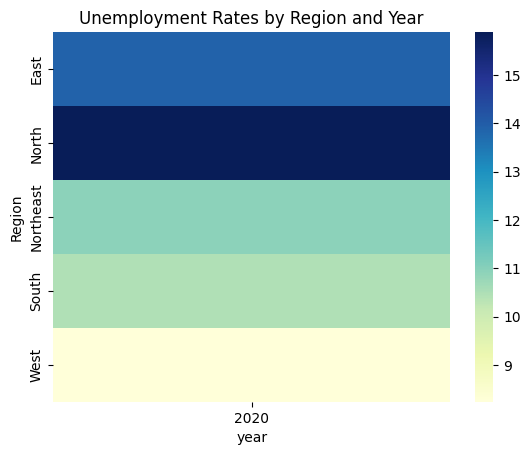

In [20]:
# Create a heatmap to show how unemployment rates have changed over time by region
unemp_by_region_year = pd.pivot_table(df, values='Estimated Unemployment Rate', index='Region', columns='year')
sns.heatmap(unemp_by_region_year, cmap='YlGnBu')
plt.title('Unemployment Rates by Region and Year')
plt.show()

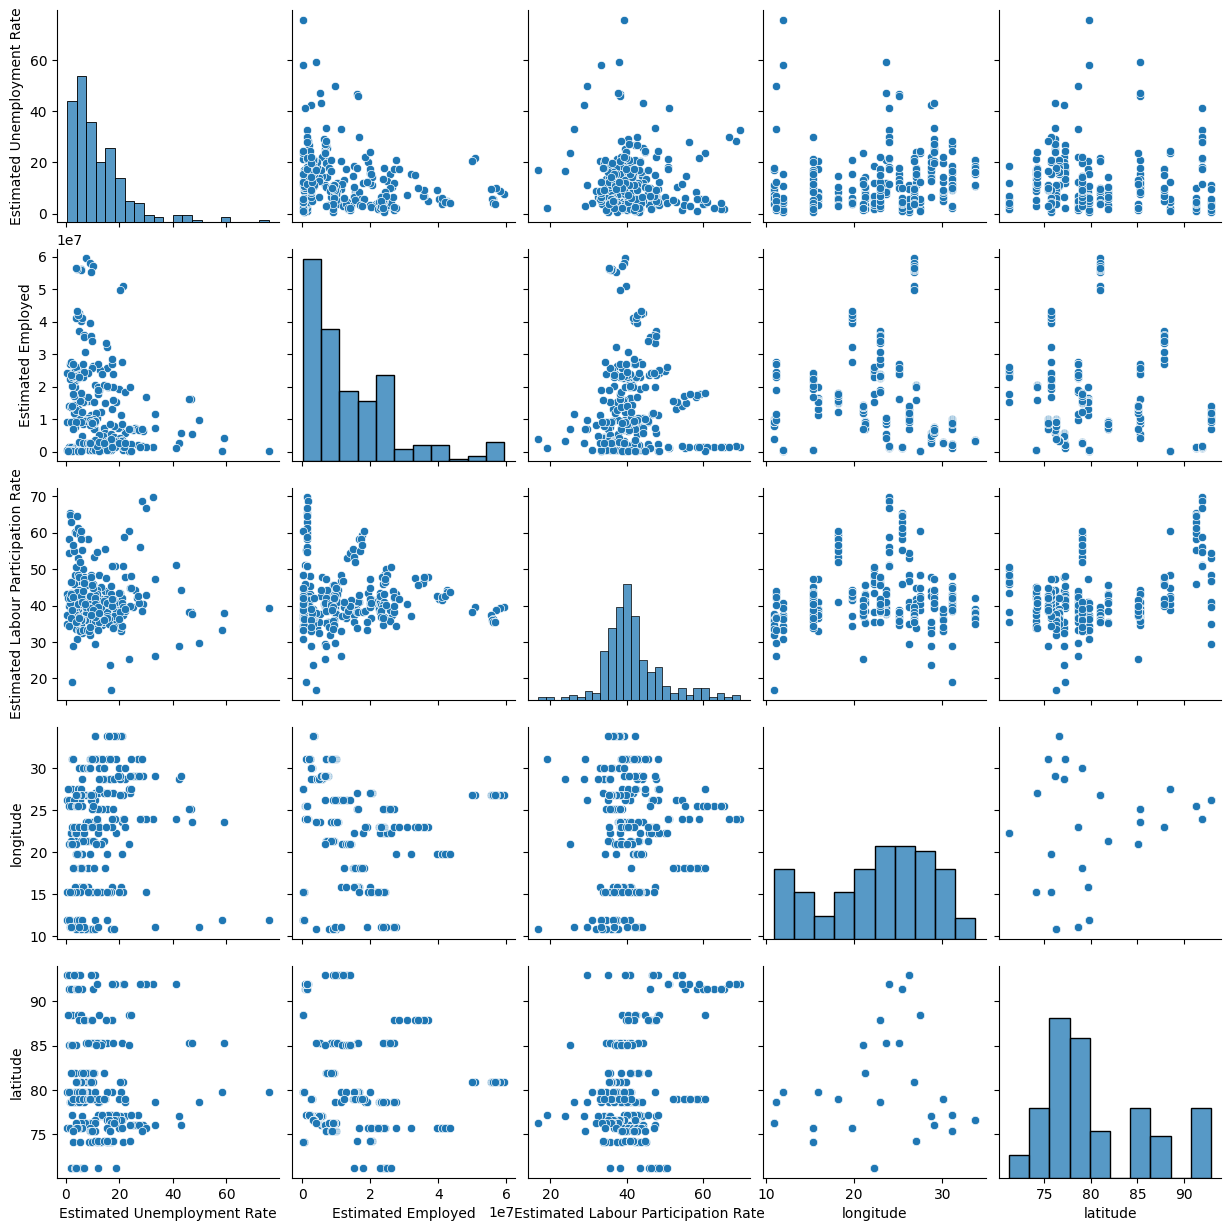

In [21]:
# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude']])
plt.show()

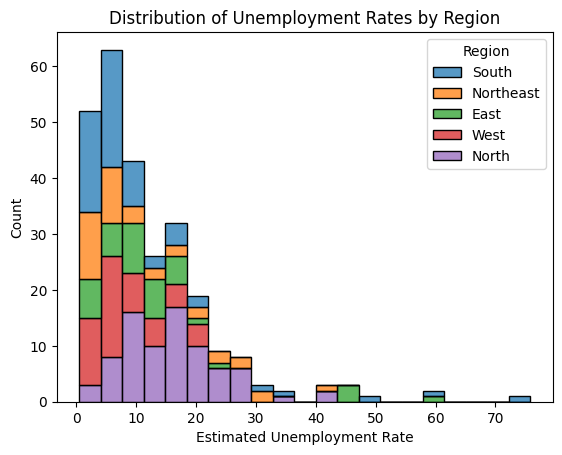

In [22]:
# Create a histogram to show the distribution of unemployment rates by region
sns.histplot(data=df, x='Estimated Unemployment Rate', hue='Region', multiple='stack')
plt.title('Distribution of Unemployment Rates by Region')
plt.show()

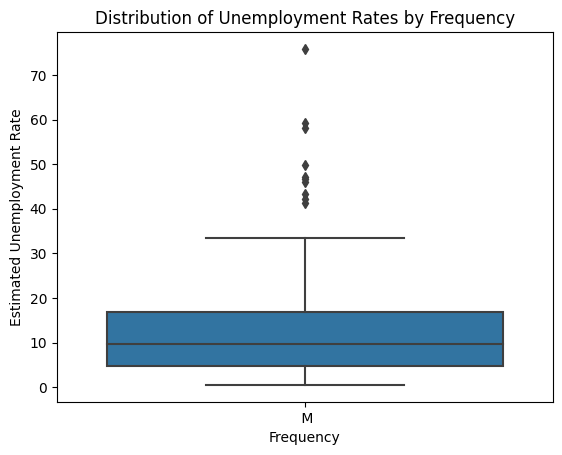

In [23]:
# Create a boxplot to show the distribution of unemployment rates by frequency
sns.boxplot(data=df, x='Frequency', y='Estimated Unemployment Rate')
plt.title('Distribution of Unemployment Rates by Frequency')
plt.show()

# Hence the project is Finished.